In [1]:
import pandas as pd
import missingno 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
import string
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
import nltk 
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
ozon_df = pd.read_csv('dataframe.csv')
wb_df = pd.read_csv('feedbacks.csv')

df = pd.concat([ozon_df, wb_df], ignore_index=True)

### Информация о датасете

In [3]:
df.head()

,Unnamed: 0,User review,Review date,Star review,Text length,Has media,Written by bot
0,0,"Упаковано просто в пакет, думала верхнюю одежд...",2024-10-01,1,373,0,0
1,1,"лёгкая,красивая",2024-09-30,5,15,0,0
2,2,"Общее впечатление- красивая, удобная. Купила д...",2024-09-30,5,217,0,0
3,3,"Нормальная, на прогулки.",2024-09-30,5,24,0,0
4,4,Как для профессионала швейного дела куртка и п...,2024-09-30,5,145,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      614 non-null    int64 
 1   User review     614 non-null    object
 2   Review date     614 non-null    object
 3   Star review     614 non-null    int64 
 4   Text length     614 non-null    int64 
 5   Has media       614 non-null    int64 
 6   Written by bot  614 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 33.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,614.0,306.500000,177.390811,0.0,153.25,306.5,459.75,613.0
Star review,614.0,4.478827,1.105543,1.0,5.00,5.0,5.00,5.0
Text length,614.0,55.179153,59.440297,1.0,19.00,35.0,63.00,378.0
Has media,614.0,0.128664,0.335101,0.0,0.00,0.0,0.00,1.0
Written by bot,614.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


### Проверка пропусков датасета

<Axes: >

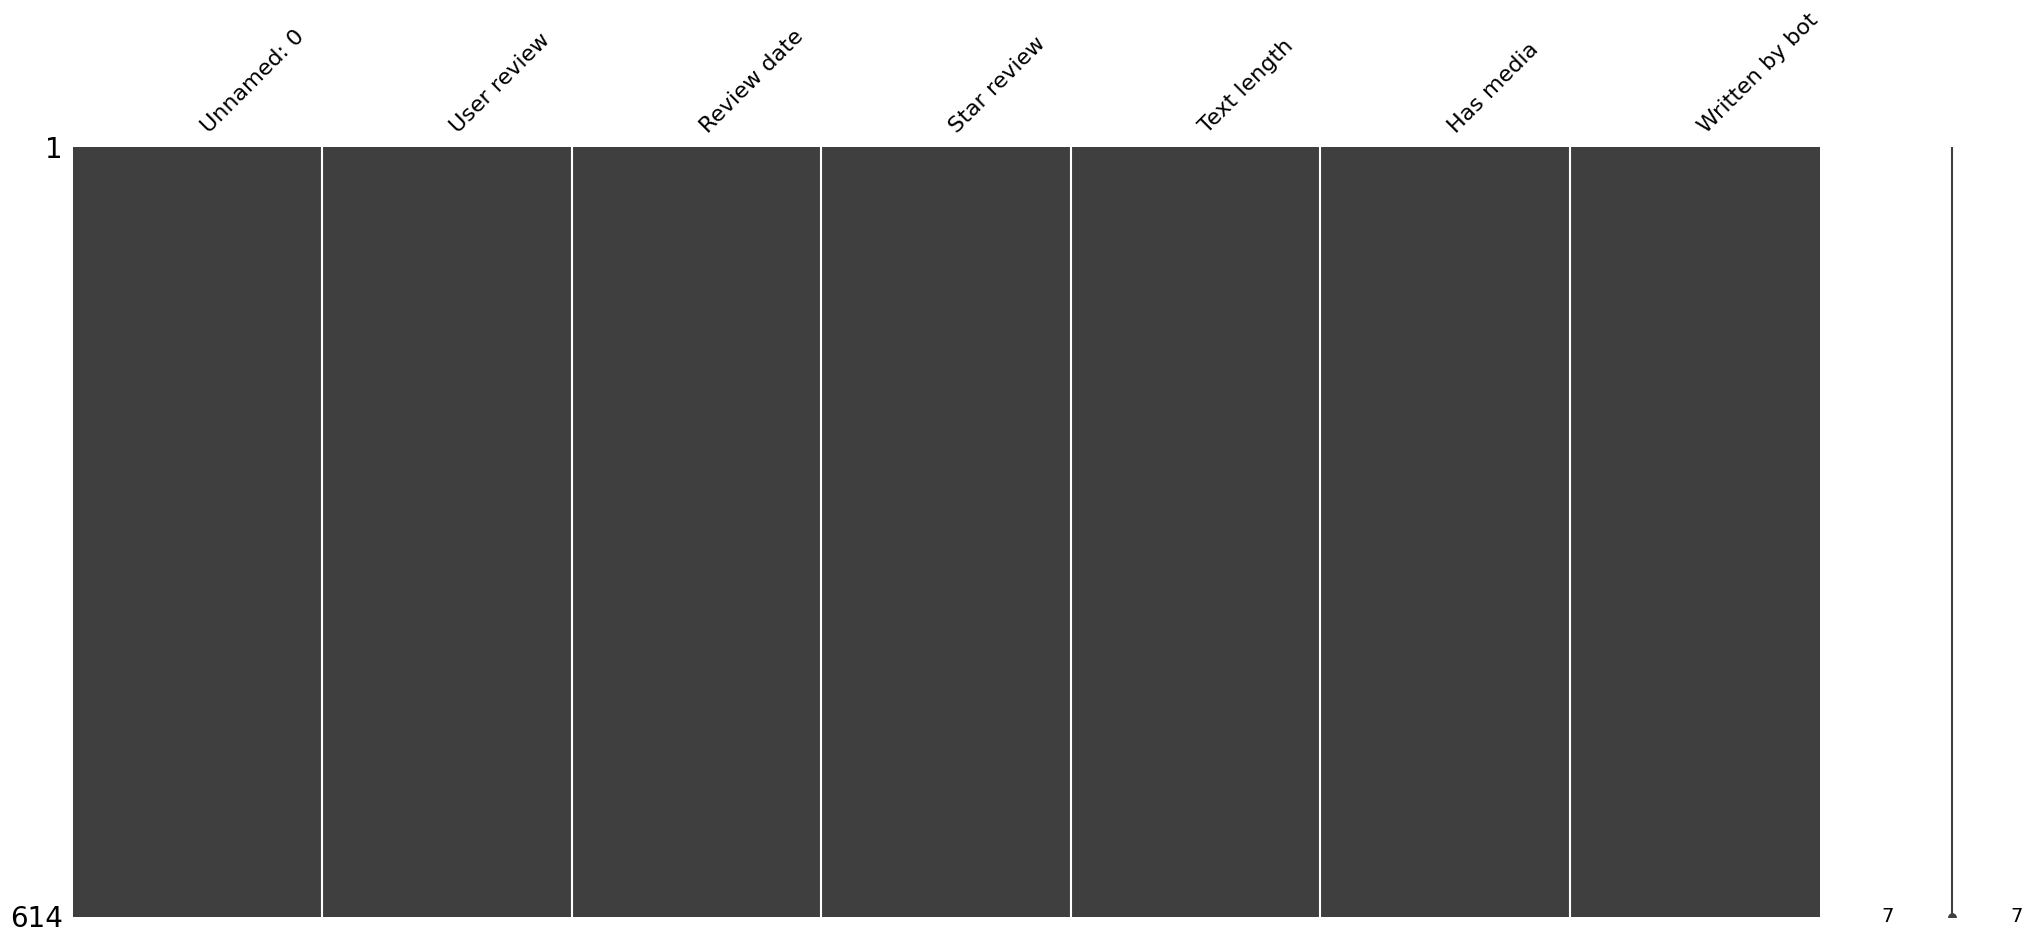

In [6]:
missingno.matrix(df)

### Препроцессинг

In [7]:
df['Review date'] = pd.to_datetime(df['Review date'])
target = df["Written by bot"]
df_review = df['User review']
df_review_date = df['Review date']
df = df.drop(columns=['Written by bot', 'User review', 'Review date', 'Unnamed: 0'])
df.head()


,Star review,Text length,Has media
0,1,373,0
1,5,15,0
2,5,217,0
3,5,24,0
4,5,145,1


### Избавление от выбросов

In [8]:
df_check = df['Text length']


Q1 = df_check.quantile(0.25)
Q3 = df_check.quantile(0.75)

IQR = Q3 - Q1 

lower_bond = Q1 - 1.5 * IQR 
upper_bond = Q3 + 1.5 * IQR 

columns_to_check = df_check[(df_check >= lower_bond) & (df_check <= upper_bond)]
df = pd.concat([columns_to_check, df], axis=1)

<Axes: >

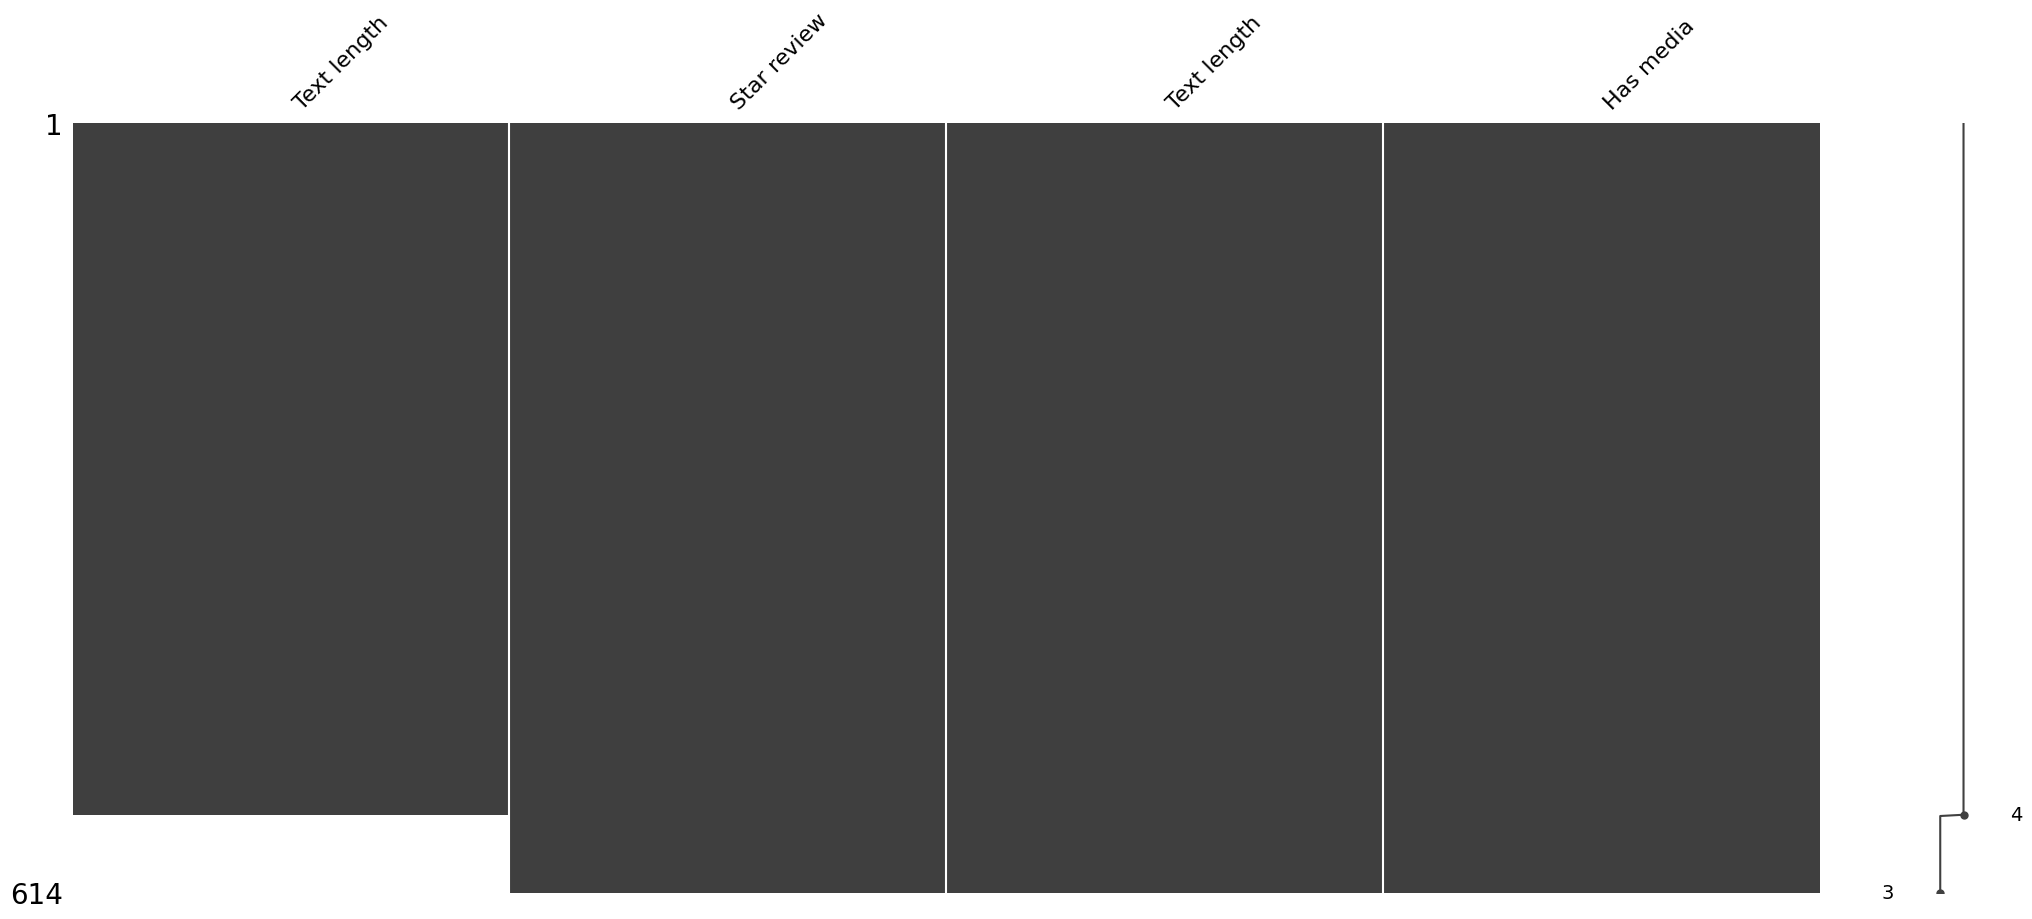

In [9]:
missingno.matrix(df)


<Axes: >

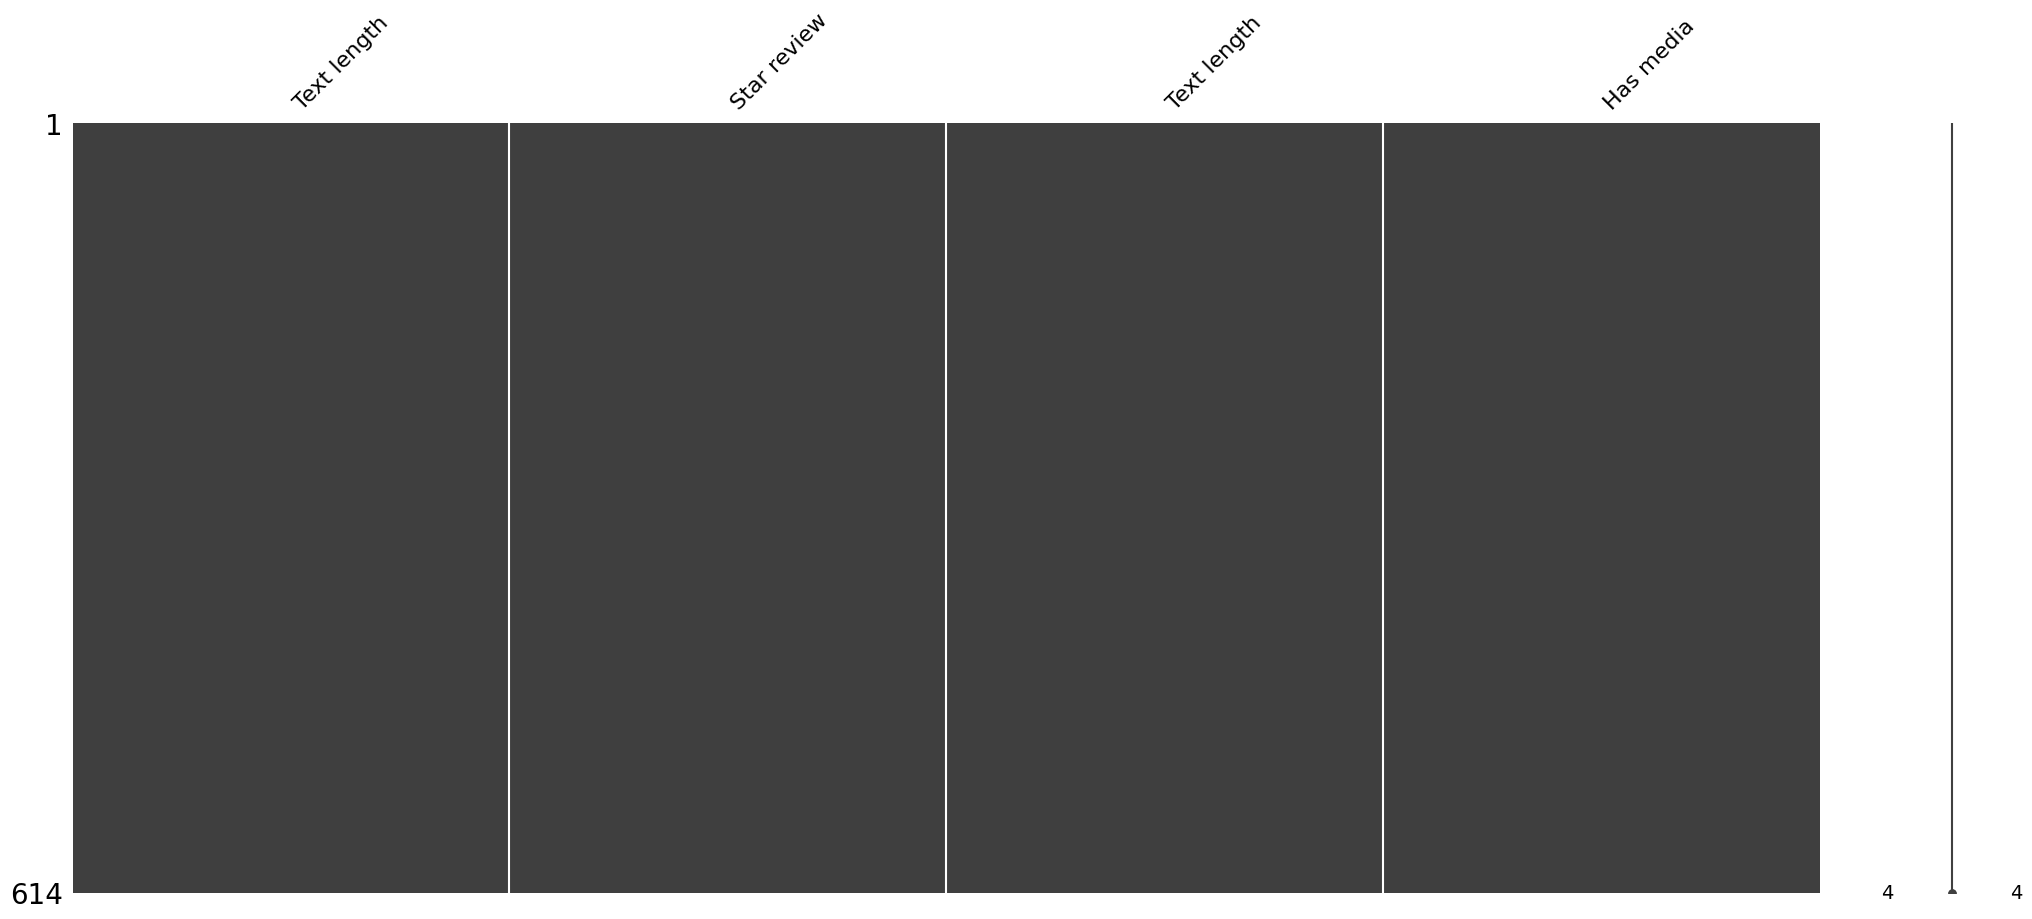

In [10]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df) 
df = pd.DataFrame(normalized_data, columns=df.columns)

imputer = KNNImputer()
df_filled = imputer.fit_transform(df)
df_filled_original = scaler.inverse_transform(df_filled)
df= pd.DataFrame(df_filled_original, columns=df.columns)
missingno.matrix(df)

### Нормализация и стандартизация

In [11]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

normalized_data = minmax_scaler.fit_transform(df)
df = pd.DataFrame(normalized_data, columns=df.columns)

standard_data = standard_scaler.fit_transform(df)
df= pd.DataFrame(standard_data, columns=df.columns)
df.head()

,Text length,Star review,Text length,Has media
0,-0.901276,0.471802,-0.676509,-0.38427
1,-0.633875,0.471802,-0.524973,-0.38427
2,0.019772,0.471802,-0.154552,-0.38427
3,-0.930987,0.471802,-0.693347,-0.38427
4,-0.039650,0.471802,-0.188227,-0.38427


### Предобработка комментариев пользователей

In [ ]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

In [12]:



lemmatize = WordNetLemmatizer()

user_review = df_review.tolist()
processed_review = []
for i in user_review:
    text = re.sub("[^а-яА-Я]", " ", i)
    text = word_tokenize(text, language="russian")
    text = [lemmatize(word) for word in i]
    text = "".join(text)
    processed_review.append(text)

tfidf_vectorizer = TfidfVectorizer()
text_values = tfidf_vectorizer.fit_transform(user_review)
print(text_values)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sagop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sagop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sagop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sagop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sagop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sagop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/russian/[0m

  Searched in:
    - 'C:\\Users\\sagop/nltk_data'
    - 'd:\\IT Projects\\GoodReview\\parser\\.venv\\nltk_data'
    - 'd:\\IT Projects\\GoodReview\\parser\\.venv\\share\\nltk_data'
    - 'd:\\IT Projects\\GoodReview\\parser\\.venv\\lib\\nltk_data'
    - 'C:\\Users\\sagop\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
